In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import font_manager
fontprop = font_manager.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
%matplotlib inline

In [2]:
data = pd.read_excel('서울특별시 공공자전거 시간대별 대여정보_201811.xlsx', header = 0)
data

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7
5,2018-11-01,0,951,연신내역 6번출구옆,정기권,F,20대,1,51.32,0.56,2400,31
6,2018-11-01,0,1029,롯데 시네마,정기권,F,20대,1,27.28,0.25,1060,4
7,2018-11-01,0,1253,오금역 3번 출구 뒤,정기권,F,20대,1,25.05,0.26,1110,6
8,2018-11-01,0,1259,방이역 1번출구,정기권,F,20대,1,15.25,0.18,770,8
9,2018-11-01,0,1268,몽촌토성역 1번출구 옆,정기권,F,20대,1,103.95,0.81,3500,31


In [3]:
One_hour = data[data['이동시간']<=60] # 사용시간이 1시간 밑인 데이터만 추출
One_hour = One_hour.reset_index(drop=True)
One_hour

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7
5,2018-11-01,0,951,연신내역 6번출구옆,정기권,F,20대,1,51.32,0.56,2400,31
6,2018-11-01,0,1029,롯데 시네마,정기권,F,20대,1,27.28,0.25,1060,4
7,2018-11-01,0,1253,오금역 3번 출구 뒤,정기권,F,20대,1,25.05,0.26,1110,6
8,2018-11-01,0,1259,방이역 1번출구,정기권,F,20대,1,15.25,0.18,770,8
9,2018-11-01,0,1268,몽촌토성역 1번출구 옆,정기권,F,20대,1,103.95,0.81,3500,31


In [4]:
One_hour['연령대코드'].value_counts() # 대부분의 사용자가 20~40대 학생 또는 직장인이라고 예상 => 약 86%

20대     189400
30대     109914
40대      72256
50대      36531
~10대     10033
60대       8515
70대~      2932
Name: 연령대코드, dtype: int64

In [5]:
time = One_hour[(One_hour['연령대코드']=='20대')| (One_hour['연령대코드']=='30대') | (One_hour['연령대코드']=='40대')]['대여시간'].value_counts()
time # 20~40대의 대여시간 분포

18    32795
8     29971
17    24544
19    24030
20    20079
16    19587
21    19364
22    18758
15    17787
9     17197
13    16956
14    16881
12    16495
7     15179
11    13934
23    13667
10    12867
0     11768
1      8886
6      6038
2      5782
3      3829
5      2624
4      2552
Name: 대여시간, dtype: int64

Text(0,0.5,'이용자의 수(명)')

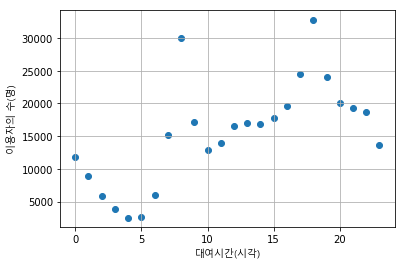

In [6]:
plt.grid()
plt.scatter(x = time.index, y = time.values) # x축이 대여시간,  y축이 대여시간 count값
plt.xlabel('대여시간(시각)', fontproperties = fontprop)
plt.ylabel('이용자의 수(명)', fontproperties = fontprop)
# 7~9시 출근, 등교시간
# 17~19시 퇴근, 하교시간이라 생각

In [7]:
u = One_hour[((One_hour['연령대코드']=='20대')| (One_hour['연령대코드']=='30대') | (One_hour['연령대코드']=='40대'))]

In [8]:
df = u[(u['대여시간']==7) | (u['대여시간']==8) | (u['대여시간']==9) | (u['대여시간']==17) | (u['대여시간']==18) | (u['대여시간']==19)]
df # 20~40대 중에서 대여시간이 7~9, 17~19시인 데이터 추출

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
2348,2018-11-01,7,731,서울시 도로환경관리센터,정기권,F,20대,1,21.62,0.19,840,5
2349,2018-11-01,7,736,오솔길공원,정기권,F,20대,1,69.85,0.68,2940,14
2350,2018-11-01,7,739,신월사거리,정기권,F,20대,1,27.54,0.28,1220,7
2351,2018-11-01,7,934,신사동 성당,정기권,F,20대,1,305.28,2.75,11860,52
2352,2018-11-01,7,941,은평뉴타운 도서관,정기권,F,20대,1,41.18,0.37,1600,6
2353,2018-11-01,7,946,독바위역,정기권,F,20대,1,20.10,0.25,1080,4
2354,2018-11-01,7,509,이마트 버스정류소 옆,정기권,F,20대,2,40.38,0.44,1920,10
2355,2018-11-01,7,1150,송정역 1번출구,정기권,F,20대,1,41.10,0.40,1730,7
2356,2018-11-01,7,1251,석촌역 2번출구,정기권,F,20대,1,84.43,0.76,3280,14
2357,2018-11-01,7,1258,가락미륭아파트 앞,정기권,F,20대,1,29.46,0.36,1550,10


In [9]:
user = df['이동시간'].value_counts()

Text(0,0.5,'이용자의 수(명)')

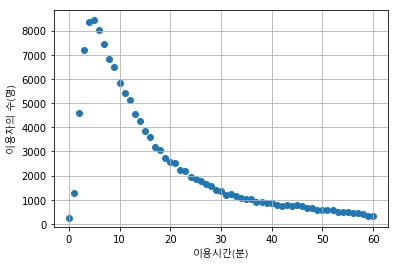

In [10]:
plt.grid()
plt.scatter(x = user.index, y = user.values) # x축이 이용시간(분),  y축이 이용시간 count값
plt.xlabel('이용시간(분)', fontproperties = fontprop)
plt.ylabel('이용자의 수(명)', fontproperties = fontprop)

그래서 결론이 뭐지

몇분을 기준으로 하는게 좋을까여?